In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plot 
import matplotlib
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Import

In [2]:
matplotlib.rcParams['figure.figsize'] =(20,10)

In [3]:
df1 = pd.read_csv('kc_house_data.csv')
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

In [4]:
df1.shape

(21597, 21)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df1.groupby('zipcode')['sqft_living'].agg('count').head(10)

zipcode
98001    361
98002    199
98003    280
98004    317
98005    168
98006    498
98007    141
98008    283
98010    100
98011    195
Name: sqft_living, dtype: int64

In [7]:
df2 = df1.drop(['sqft_lot15', 'id', 'sqft_living15','long','lat'], axis = 'columns')

In [8]:
df2 = df2.rename(columns = {'date' : 'sell_date', 'condition':'overall_condition'})

In [9]:
df2.head()

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074


In [10]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,yr_built,yr_renovated,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'overall_condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

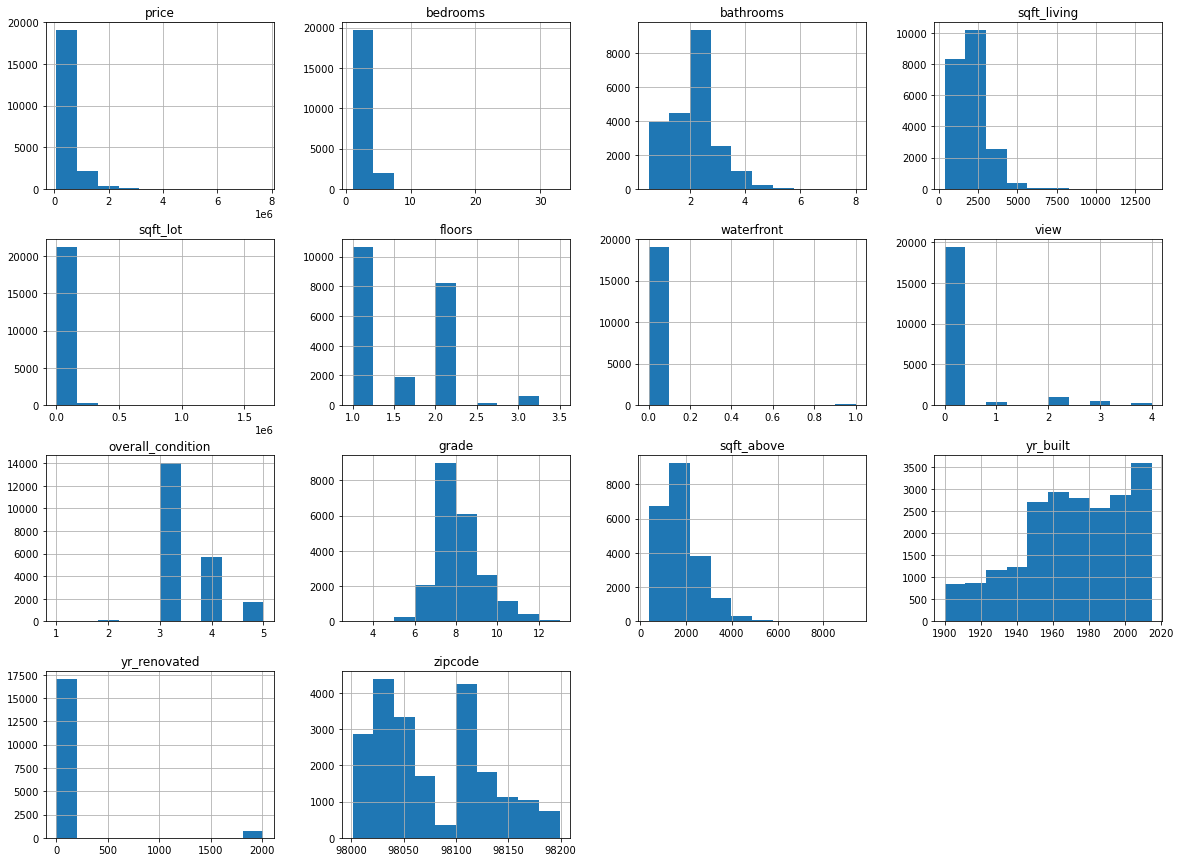

In [11]:
df2.hist(figsize=(20, 15))

# Data Cleaning

<AxesSubplot:>

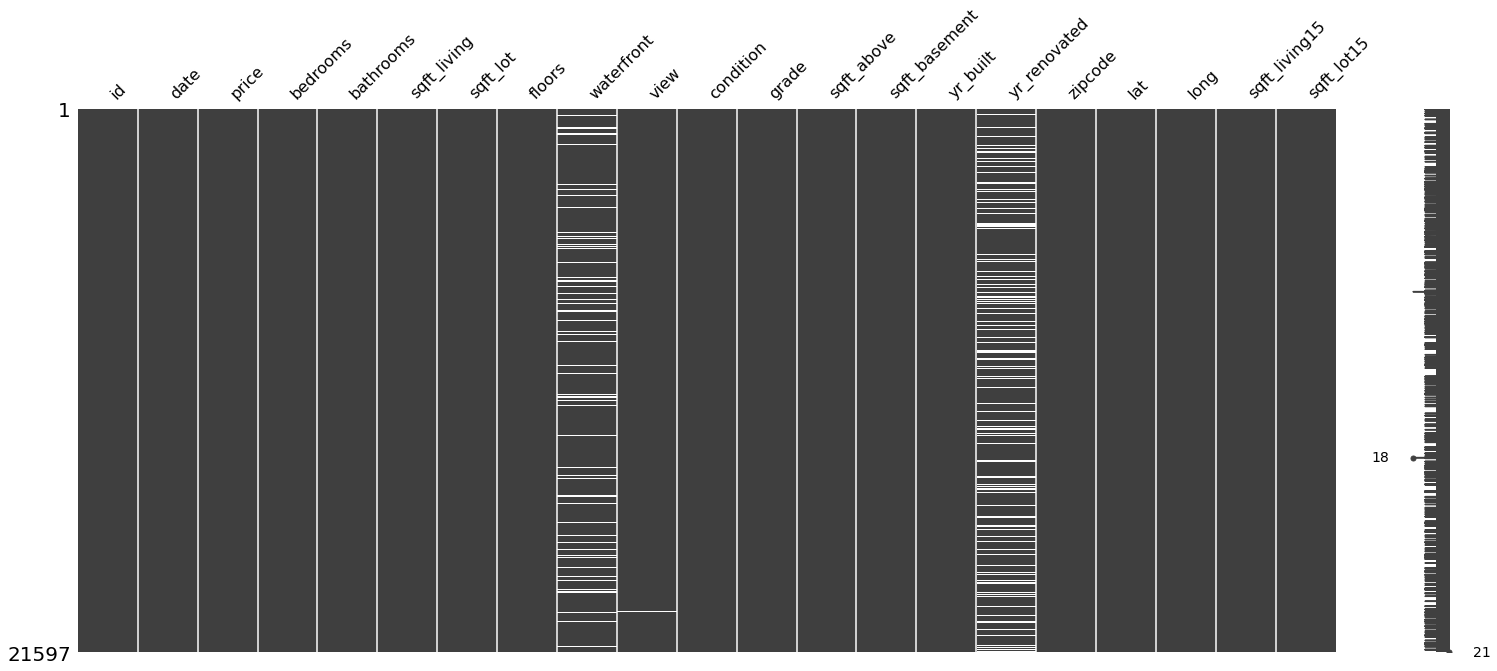

In [12]:
msno.matrix(df1)

In [13]:
df2.isnull().sum()

sell_date               0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2376
view                   63
overall_condition       0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated         3842
zipcode                 0
dtype: int64

Most nulls are on waterfront and yr_renovated. This is acceptable, since not all houses are renovated or are on the waterfront. 

In [14]:
df2['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [15]:
df2['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [16]:
df2['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [17]:
#outlier value of 33 bedrooms in a small house
df2[df2['bedrooms']>20]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
15856,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103


In [18]:
# Change 33 bedrooms to 3 bedrooms.
df2['bedrooms'].replace(to_replace=33, value=3, inplace=True)

## Check for Correct Data Type

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True

In [20]:
#sqft_living area is a float
df2[df2['sqft_living'].apply(is_float)]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027


In [21]:
#no floats for sqft living
df2[~df2['sqft_living'].apply(is_float)]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


In [22]:
df2[df2['price'].apply(is_float)]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027


In [23]:
def col_float_check(df):
    try:
        for i in df:
            k = df[~df[i].apply(is_float)]
            print('\n')
            print(i)
            display(k)
    except:
        print('Invalid Dataframe')

In [24]:
col_float_check(df2)



sell_date


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027




price


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




bedrooms


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




bathrooms


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




sqft_living


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




sqft_lot


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




floors


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




waterfront


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




view


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




overall_condition


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




grade


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




sqft_above


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




sqft_basement


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003
18,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,4,7,1200,?,1921,0.0,98002
42,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,?,2014,0.0,98053
79,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,3,10,3450,?,2002,0.0,98010
112,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,7,1160,?,1980,0.0,98038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,3,7,1390,?,2008,0.0,98103
21447,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,3,7,2330,?,2013,NaN,98042
21473,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,3,8,980,?,2008,0.0,98117
21519,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,3,7,2380,?,2010,0.0,98023




yr_built


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




yr_renovated


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




zipcode


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


In [25]:
df2['sqft_basement'].replace('?', 0, inplace=True)

In [26]:
df2[~df2['sqft_basement'].apply(is_float)]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


In [27]:
col_float_check(df2)



sell_date


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027




price


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




bedrooms


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




bathrooms


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




sqft_living


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




sqft_lot


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




floors


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




waterfront


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




view


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




overall_condition


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




grade


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




sqft_above


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




sqft_basement


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




yr_built


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




yr_renovated


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode




zipcode


,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


# Feature Engineering

In [28]:
df3 = df2.copy()

In [29]:
df3.head()

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074


In [30]:
df3['price_per_sqft'] =  df3['price'] / df3['sqft_living'] 

In [31]:
df3['price_per_sqft_lot'] =  df3['price'] / df3['sqft_lot']

In [32]:
df3.head()

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft,price_per_sqft_lot
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,188.050847,39.274336
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,209.338521,74.288870
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,233.766234,18.000000
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,308.163265,120.800000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,303.571429,63.118812


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sell_date           21597 non-null  object 
 1   price               21597 non-null  float64
 2   bedrooms            21597 non-null  int64  
 3   bathrooms           21597 non-null  float64
 4   sqft_living         21597 non-null  int64  
 5   sqft_lot            21597 non-null  int64  
 6   floors              21597 non-null  float64
 7   waterfront          19221 non-null  float64
 8   view                21534 non-null  float64
 9   overall_condition   21597 non-null  int64  
 10  grade               21597 non-null  int64  
 11  sqft_above          21597 non-null  int64  
 12  sqft_basement       21597 non-null  object 
 13  yr_built            21597 non-null  int64  
 14  yr_renovated        17755 non-null  float64
 15  zipcode             21597 non-null  int64  
 16  pric

is there a dimensionality issue here? 

In [34]:
location_stats = df3.groupby('zipcode')['zipcode'].agg('count').sort_values(ascending = False)

In [35]:
location_stats

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [36]:
len(location_stats[location_stats<=200])

18

No dimensionality problem

In [37]:
df3.price_per_sqft.describe()

count    21597.000000
mean       264.143368
std        110.000061
min         87.588235
25%        182.291667
50%        244.644550
75%        318.333333
max        810.138889
Name: price_per_sqft, dtype: float64

# Remove Outliers

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('zipcode'):
        #mean
        m = np.mean(subdf['price_per_sqft'])
        #standard div of price per sq ft
        st = np.std(subdf['price_per_sqft'])
        #keep data points that are above -1 std and below 1 std
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index =True)
    return df_out

In [39]:
df4 = remove_pps_outliers(df3)

In [40]:
df4.shape

(16504, 18)

In [41]:
df3.shape

(21597, 18)

In [42]:
import matplotlib.pyplot as plt

In [43]:
def plot_scatter_chart(df,location):
    '''This method creates a scatterplot of 2 and 3 bedrooms in a location, and their total area and price per square foot in IND Rupees'''
    #creates two different dataframes: one for 2 bedrooms and 3 bedrooms
    bhk2 = df[(df.zipcode == location) & (df.bedrooms ==2)]
    bhk3 = df[(df.zipcode == location) & (df.bedrooms ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    #create scatterplot
    plt.scatter(bhk2.sqft_living, bhk2.price_per_sqft, color = 'blue', label='2 BHK', s = 50)
    plt.scatter(bhk3.sqft_living, bhk3.price_per_sqft, marker = '+', color = 'green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

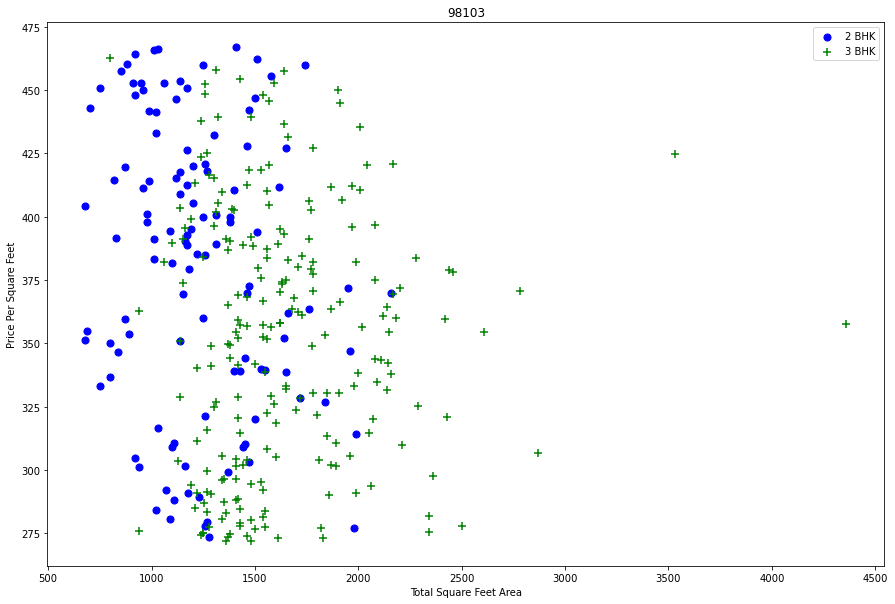

In [44]:
plot_scatter_chart(df4, 98103)

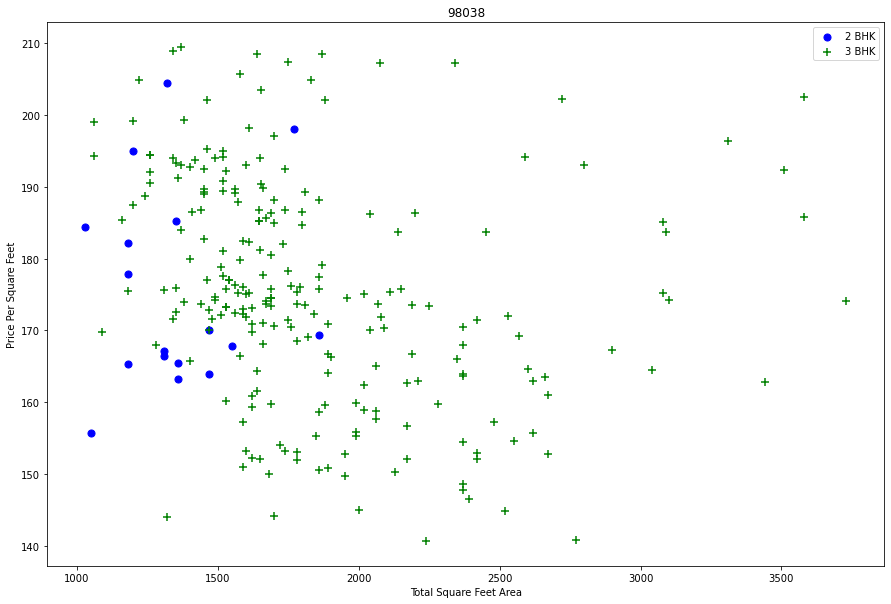

In [45]:
plot_scatter_chart(df4, 98038)

In [46]:
df4

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft,price_per_sqft_lot
0,10/9/2014,287000.0,4,2.50,2240,4648,2.0,0.0,0.0,3,7,2240,0.0,2005,0.0,98001,128.125000,61.746988
1,10/28/2014,480000.0,4,2.50,3230,16171,2.0,0.0,NaN,3,9,2520,710.0,2001,0.0,98001,148.606811,29.682765
2,1/14/2015,465000.0,3,2.50,2714,17936,2.0,0.0,0.0,3,9,2714,0.0,2005,0.0,98001,171.333825,25.925513
3,10/22/2014,360000.0,4,2.50,2160,9528,2.0,0.0,0.0,3,9,2160,0.0,1992,0.0,98001,166.666667,37.783375
4,7/21/2014,230000.0,3,2.00,1450,11204,1.0,0.0,0.0,3,7,1450,0.0,2003,0.0,98001,158.620690,20.528383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,4/2/2015,570000.0,3,3.25,1550,1280,2.0,0.0,0.0,3,9,1220,330.0,2013,0.0,98199,367.741935,445.312500
16500,10/15/2014,1110000.0,4,3.50,3660,4760,2.0,NaN,0.0,3,9,2840,820.0,2014,0.0,98199,303.278689,233.193277
16501,11/12/2014,1010000.0,4,3.25,3610,4000,2.0,0.0,0.0,3,9,2640,970.0,2007,NaN,98199,279.778393,252.500000
16502,8/1/2014,453000.0,3,2.50,1510,1618,2.5,0.0,0.0,3,8,1330,180.0,2011,0.0,98199,300.000000,279.975278


import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df4.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [47]:
df4.bathrooms.unique()

array([2.5 , 2.  , 1.5 , 1.75, 1.  , 2.75, 2.25, 3.  , 0.75, 3.5 , 5.  ,
       3.25, 4.  , 3.75, 6.  , 5.5 , 4.25, 4.5 , 4.75, 5.25, 5.75, 6.75,
       0.5 , 1.25, 6.25])

In [48]:
df4.bedrooms.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 11], dtype=int64)

# Machine Learning Model

In [49]:
dummies = pd.get_dummies(df4.zipcode)

In [50]:
dummies.head(4)

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df5 = pd.concat([df4, dummies], axis = 'columns')

In [52]:
df6 = df5.drop('zipcode', axis = 'columns')

In [53]:
df6.head()

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,10/9/2014,287000.0,4,2.5,2240,4648,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,10/28/2014,480000.0,4,2.5,3230,16171,2.0,0.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0
2,1/14/2015,465000.0,3,2.5,2714,17936,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,10/22/2014,360000.0,4,2.5,2160,9528,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,7/21/2014,230000.0,3,2.0,1450,11204,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df6 = df6.drop(['sell_date', 'waterfront', 'view', 'sqft_lot', 
                'overall_condition', 'grade', 'sqft_above', 'sqft_basement', 
                'yr_built', 'yr_renovated', 'price_per_sqft_lot', 'floors'], axis = 'columns')

In [55]:
df6.columns

Index([         'price',       'bedrooms',      'bathrooms',    'sqft_living',
       'price_per_sqft',            98001,            98002,            98003,
                  98004,            98005,            98006,            98007,
                  98008,            98010,            98011,            98014,
                  98019,            98022,            98023,            98024,
                  98027,            98028,            98029,            98030,
                  98031,            98032,            98033,            98034,
                  98038,            98039,            98040,            98042,
                  98045,            98052,            98053,            98055,
                  98056,            98058,            98059,            98065,
                  98070,            98072,            98074,            98075,
                  98077,            98092,            98102,            98103,
                  98105,            98106,          

In [56]:
df6.isnull().any().sum()

0

In [57]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [58]:
clean_dataset(df6)

,price,bedrooms,bathrooms,sqft_living,price_per_sqft,98001,98002,98003,98004,98005,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,287000.0,4.0,2.50,2240.0,128.125000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,480000.0,4.0,2.50,3230.0,148.606811,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,465000.0,3.0,2.50,2714.0,171.333825,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,360000.0,4.0,2.50,2160.0,166.666667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,230000.0,3.0,2.00,1450.0,158.620690,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,570000.0,3.0,3.25,1550.0,367.741935,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16500,1110000.0,4.0,3.50,3660.0,303.278689,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16501,1010000.0,4.0,3.25,3610.0,279.778393,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16502,453000.0,3.0,2.50,1510.0,300.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
X = df6.drop(['price'], axis = 'columns')

In [60]:
X.head()

,bedrooms,bathrooms,sqft_living,price_per_sqft,98001,98002,98003,98004,98005,98006,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,4,2.5,2240,128.125000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2.5,3230,148.606811,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.5,2714,171.333825,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2.5,2160,166.666667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.0,1450,158.620690,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df6.replace([np.inf, -np.inf], np.nan)

,price,bedrooms,bathrooms,sqft_living,price_per_sqft,98001,98002,98003,98004,98005,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,287000.0,4,2.50,2240,128.125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,480000.0,4,2.50,3230,148.606811,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,465000.0,3,2.50,2714,171.333825,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,360000.0,4,2.50,2160,166.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,230000.0,3,2.00,1450,158.620690,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,570000.0,3,3.25,1550,367.741935,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16500,1110000.0,4,3.50,3660,303.278689,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16501,1010000.0,4,3.25,3610,279.778393,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16502,453000.0,3,2.50,1510,300.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y= df6.price

In [63]:
y.shape

(16504,)

In [64]:
X.shape

(16504, 74)

In [65]:
y.head()

0    287000.0
1    480000.0
2    465000.0
3    360000.0
4    230000.0
Name: price, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [67]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.9487262228633137

In [68]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score 

cv = ShuffleSplit(n_splits = 5, test_size = 2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.89560673, 0.95096932, 0.98450649, 0.94455835, 0.97055931])

# Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 

In [70]:
def find_best_model_using_GridSearchCV(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize' : [True, False]
            }
            
        },
        'lasso' : {
            'model' : Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config, in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [71]:
#ignore grid search warnings
import warnings
warnings.filterwarnings("ignore")

In [72]:
find_best_model_using_GridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.943923,{'normalize': True}
1,lasso,0.943931,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.992873,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [73]:
X

,bedrooms,bathrooms,sqft_living,price_per_sqft,98001,98002,98003,98004,98005,98006,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,4,2.50,2240,128.125000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2.50,3230,148.606811,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.50,2714,171.333825,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2.50,2160,166.666667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1450,158.620690,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,3,3.25,1550,367.741935,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16500,4,3.50,3660,303.278689,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16501,4,3.25,3610,279.778393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16502,3,2.50,1510,300.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
def predict_price(zipcode, bed, bath, sqft_living):
    loc_index = np.where(X.columns == zipcode)[0][0]
    
    x= np.zeros(len(X.columns))
    x[0] = bed
    x[1] = bath
    x[2] = sqft_living
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [77]:
predict_price(98001, 4, 3, 2240)

52342.15625

# Export Model

In [78]:
import pickle
with open('king_county_price_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [80]:
import json
columns = {
    'data_columns': [str(col).lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))